In [ ]:
pip install pytrends

In [4]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

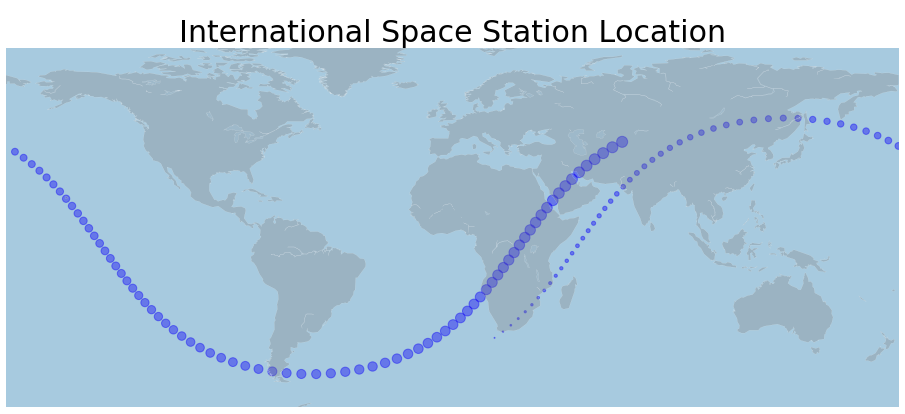

In [5]:
Image(filename='1.png', width='80%')

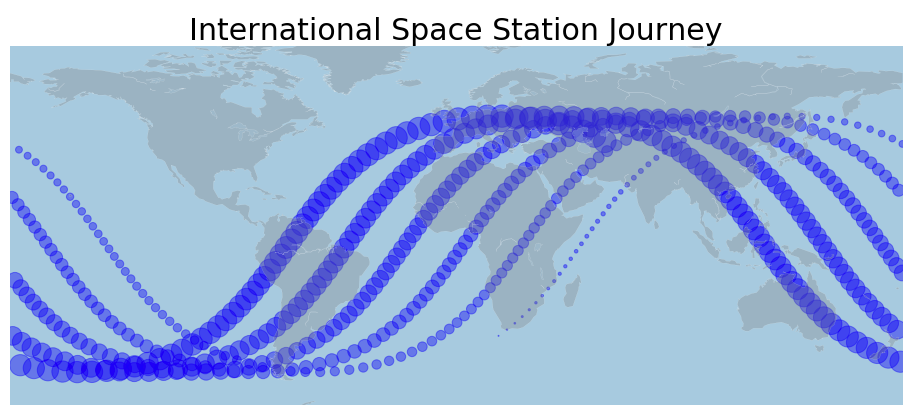

In [6]:
Image(filename='2.png', width='80%')

In [7]:
# Who is in space right now?
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()
    

{'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'},
  {'craft': 'ISS', 'name': 'Oleg Novitskiy'},
  {'craft': 'ISS', 'name': 'Pyotr Dubrov'},
  {'craft': 'ISS', 'name': 'Thomas Pesquet'},
  {'craft': 'ISS', 'name': 'Megan McArthur'},
  {'craft': 'ISS', 'name': 'Shane Kimbrough'},
  {'craft': 'ISS', 'name': 'Akihiko Hoshide'},
  {'craft': 'ISS', 'name': 'Anton Shkaplerov'},
  {'craft': 'ISS', 'name': 'Klim Shipenko'},
  {'craft': 'ISS', 'name': 'Yulia Peresild'},
  {'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'},
  {'craft': 'Shenzhou 13', 'name': 'Wang Yaping'},
  {'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'}],
 'number': 13,
 'message': 'success'}

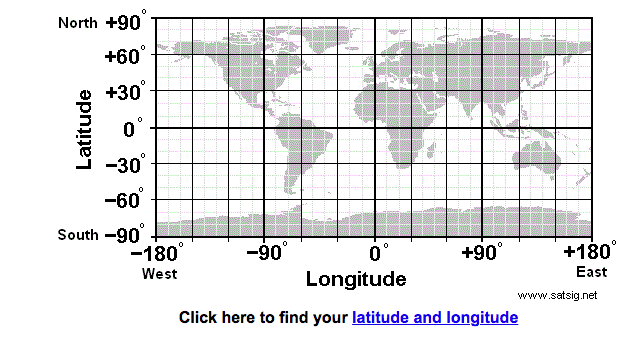

In [8]:
# http://www.satsig.net/lat_long.htm
Image(filename='3.png', width='60%')


In [9]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = (r.json())
print(space_station_location)

space_station_location['iss_position']['latitude']
space_station_location['iss_position']['longitude']
space_station_location['timestamp']

{'timestamp': 1634325564, 'message': 'success', 'iss_position': {'longitude': '122.8919', 'latitude': '-31.4993'}}


1634325564

In [10]:
import matplotlib
import numpy 
import pandas

In [ ]:
conda install -c conda-forge proj4

In [ ]:
pip install geos

In [ ]:
pip install Basemap

In [ ]:
# let's plot the ISS current location
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")


m.scatter(float(space_station_location['iss_position']['longitude']), 
          float(space_station_location['iss_position']['latitude']), 
          s=500, alpha=0.4,color='blue')

 
plt.title('International Space Station Location' , fontsize=30) 

In [ ]:
record_data = False
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()


    space_station_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        # dump copy to file
        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        # safety break
        if len(space_station_data) > 18000:
            break
            
        # let it sleep 60 seconds
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))

In [ ]:
# load historical data
iss_flight_record = pd.read_csv('<<REPLACE WITH YOUR FILE>>')
# translate timestamp into readable
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']] 

# add teh date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time

# add an plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
 
iss_flight_record.head()

In [ ]:
# you will need to pip install Basemap - https://matplotlib.org/basemap/users/installing.html
from mpl_toolkits.basemap import Basemap

# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

 
 
m.scatter(iss_flight_record['longitude'], 
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'] , alpha=0.4,color='blue')

 
plt.title('International Space Station Location' , fontsize=30) 

In [ ]:
# each dot represents one minute - can we predict where it will be in the next 10 minutes?
tmp_df = iss_flight_record.tail(10)
tmp_df

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

In [ ]:
# predict longitude 1 periods out
predicted_latitude = np.ceil(slope * 20 + intercept)

print('Next predicted point:', predicted_latitude)

In [ ]:
# predict longitude 1 periods out
predicted_latitude = np.ceil(slope * 20 + intercept)

print('Next predicted point:', predicted_latitude)

In [ ]:
# approximate 10 periods out 
predicted_latitude = np.ceil(slope * 60 + intercept)

print('Next predicted point:', predicted_latitude)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')

In [ ]:
x = tmp_df['longitude']
y = tmp_df['latitude']

poly_regression = np.poly1d(np.polyfit(x, y, 3))

predicted_latitude =  poly_regression(20)

print('Next predicted point:', predicted_latitude)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')

In [ ]:

Image(filename='world-map-backround.png', width='80%')